### What is `scipy.spatial`?

*scipy.spatial* is a powerful module when it comes to working with geometrical data or any kind of spatial data. It’s basically your toolbox for handling distances, shapes, nearest neighbors, and much more when you’re dealing with points in space (2D, 3D, or even higher dimensions).

Imagine you have a map, and you want to calculate the distance between different cities (points). Or maybe you want to find out which city is the closest to a particular point. All of this becomes easy with `scipy.spatial`. It also helps in creating boundaries around points (convex hulls), dividing areas into regions (Voronoi diagrams), or even finding clusters of points.

Let’s break it down in a way that feels comfortable and understandable, the Indian style! Step-by-step, with proper focus on concepts and examples.

### Functions in `scipy.spatial`

### 1. Distance Calculation: **Finding Distances Between Points**

In geometry, one of the most basic yet essential operations is measuring distance between points. Suppose you have multiple points, and you want to find out the pairwise distances between them or even the distance between two sets of points. This is super important for things like clustering, nearest neighbor search, and even routing in logistics.

### Example 1: Pairwise Distances with `pdist()`

Here, `pdist()` is used to compute the distances between every pair of points in an array.

In [4]:
from scipy.spatial import distance
import numpy as np

points = np.array([[1, 2], [3, 4], [5, 6]])
dist_matrix = distance.pdist(points, metric='euclidean')
print(dist_matrix)

[2.82842712 5.65685425 2.82842712]


- You have three points here: (1,2), (3,4), and (5,6).
- `pdist()` calculates the distance between every pair of points using Euclidean distance (the straight-line distance).
- The result is a 1D array that contains distances between each pair.

### Distance Between Two Sets of Points with `cdist()`

Now, if you have two arrays of points and want to calculate distances between each point in the first array and all points in the second array, `cdist()` is your tool.

In [5]:
points1 = np.array([[1, 2], [3, 4]])
points2 = np.array([[5, 6], [7, 8]])
distances = distance.cdist(points1, points2, metric='euclidean')
print(distances)

[[5.65685425 8.48528137]
 [2.82842712 5.65685425]]


- This calculates distances between all points in `points1` and `points2`. You get a matrix where each element is the distance between a point from `points1` and one from `points2`.

So, whenever you have points and you want to calculate distances (which is very common in machine learning, clustering, etc.), `pdist()` and `cdist()` are your go-to functions!

### Convex Hull: **Drawing the Outer Boundary Around Points**

Now, let’s talk about **convex hulls**. Imagine you have a set of points scattered in space. The convex hull is like a rubber band that stretches around the outermost points, forming a polygon that encloses all the points inside it.

Why is this useful? Well, it helps in defining the shape of data, especially in areas like computer graphics, pattern recognition, and geographic data analysis.

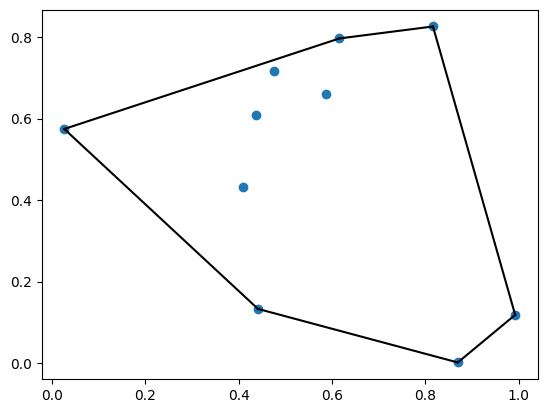

In [8]:
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2)  # 10 random points in 2D
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')  # Plotting the points
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')  # Plotting the hull
plt.show()

- You generate 10 random points in 2D. `ConvexHull()` calculates the convex hull, which is the boundary formed by connecting the outermost points.
- `simplices` gives you the edges of the hull, which you then plot.

Convex hulls are useful for defining the boundary of a cluster of points and identifying the "shape" of your data.

### Voronoi Diagrams: **Dividing Space Based on Nearest Points**

A **Voronoi diagram** divides space into regions where each region is associated with the nearest point. Imagine you have several points scattered across a map, and you want to assign territories to these points. Each point “owns” the region closest to it, and this is precisely what Voronoi diagrams do.

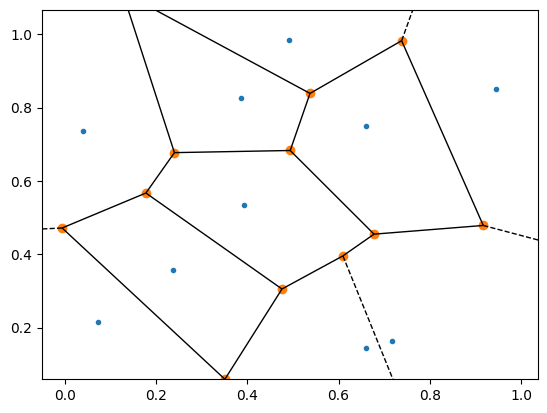

In [9]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(10, 2)  # 10 random points in 2D
vor = Voronoi(points)

voronoi_plot_2d(vor)  # Plotting the Voronoi diagram
plt.show()

- You generate random points and pass them to `Voronoi()`, which creates a Voronoi diagram.
- `voronoi_plot_2d()` helps you visualize this diagram, showing how space is divided into regions where each region is closest to a specific point.

This kind of division is widely used in fields like geography, computer vision, and resource allocation

### KDTree and cKDTree: **Efficient Search for Nearest Neighbors**

Now, what if you have a large dataset and you want to search for the nearest point or neighbor to a given point? **KDTree** and **cKDTree** are data structures designed to do exactly that, and they do it very efficiently.

Imagine you are playing a game where you need to find which enemy is closest to you—KDTree can help you figure that out quickly!

In [1]:
from scipy.spatial import KDTree
import numpy as np

points = np.random.rand(10, 2)  # 10 random points
tree = KDTree(points)
query_point = [0.1, 0.2]
dist, index = tree.query(query_point)
print(f"Nearest point: {points[index]}, Distance: {dist}")

Nearest point: [0.00157259 0.2776522 ], Distance: 0.12537072528135054


- Using `query()`, you find the nearest point to your query point `[0.1, 0.2]` and return its distance.
- You create a `KDTree` with random points

This is super fast, even if you have millions of points. That’s why it’s used in algorithms like nearest neighbor search, collision detection, and even machine learning.

### Other Key Tools

- **Delaunay Triangulation**: This is used to divide a set of points into triangles in the most efficient way possible. It’s used for things like mesh generation and interpolation.

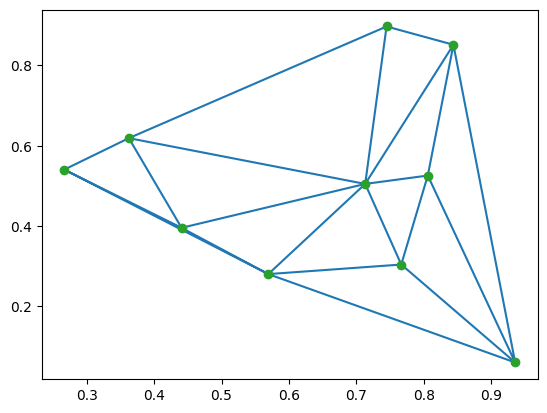

In [1]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

points = np.random.rand(10, 2)
tri = Delaunay(points)

plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()